<a href="https://colab.research.google.com/github/cesaryuri/PATH-FINDER/blob/main/Melhor_primeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

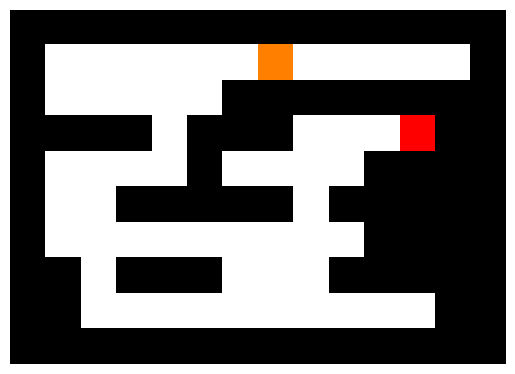

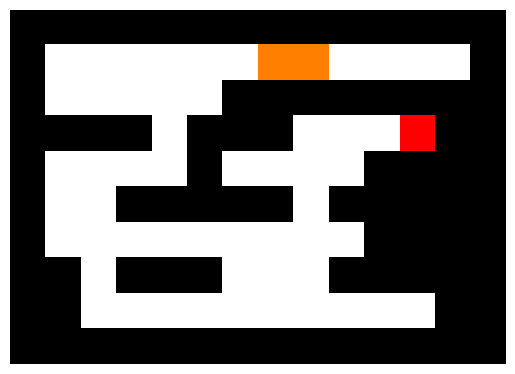

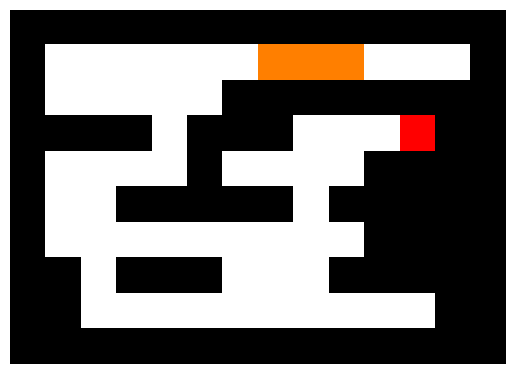

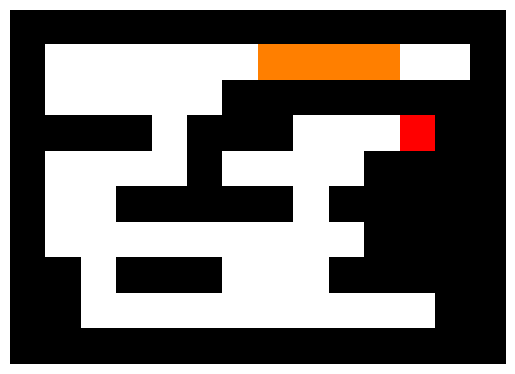

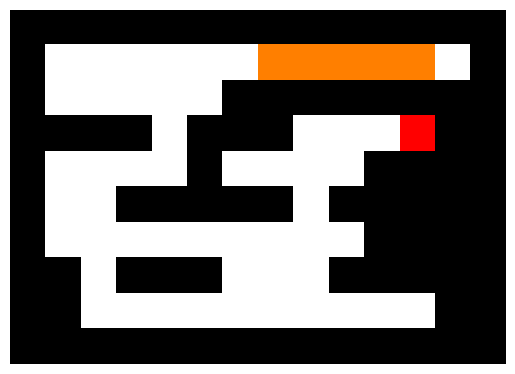

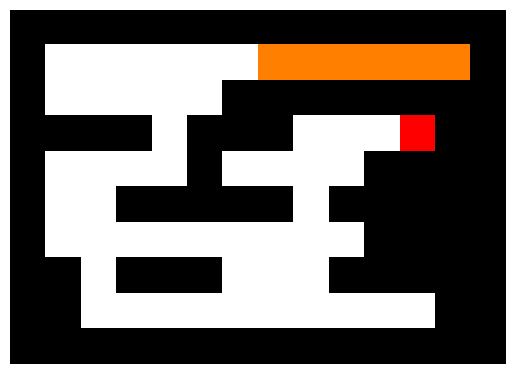

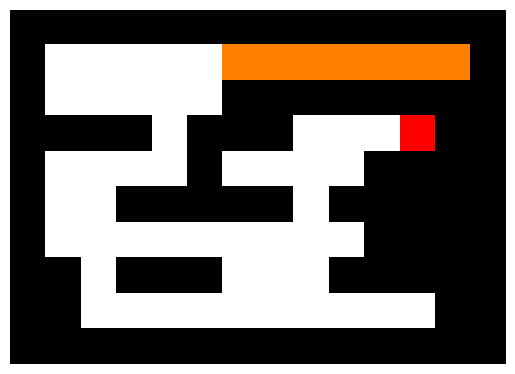

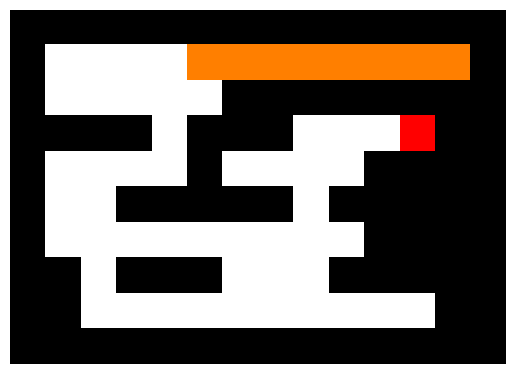

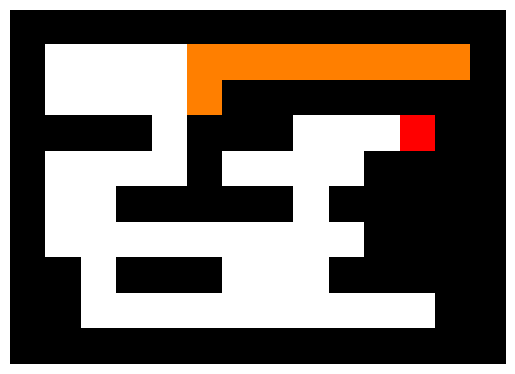

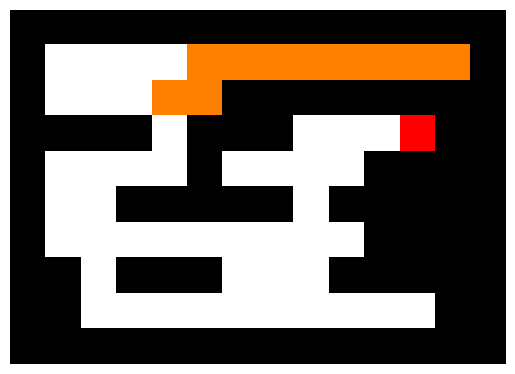

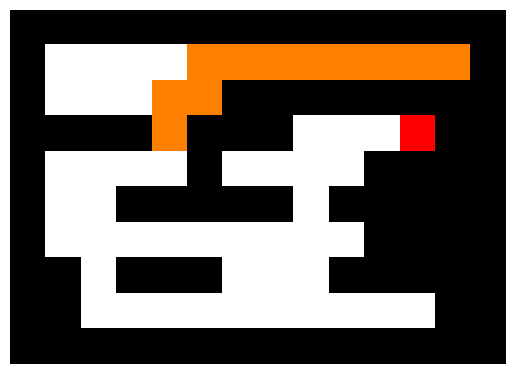

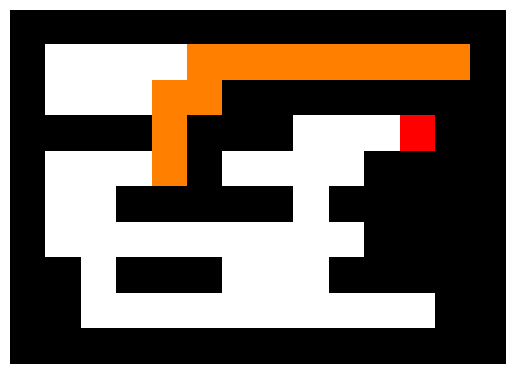

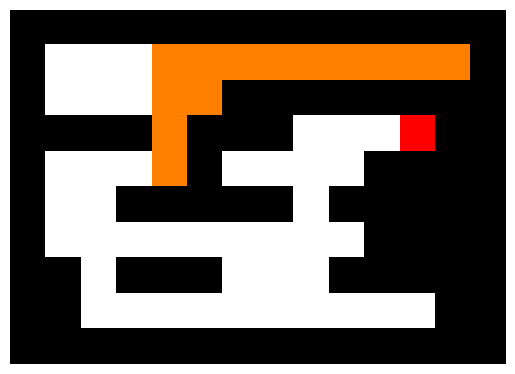

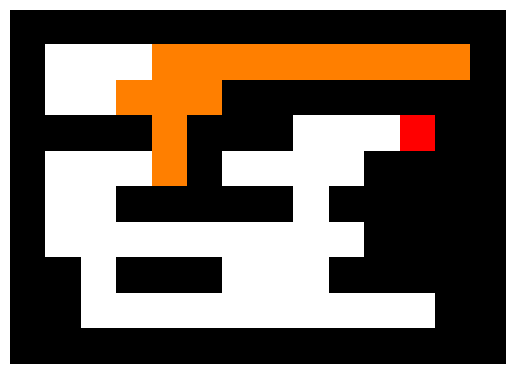

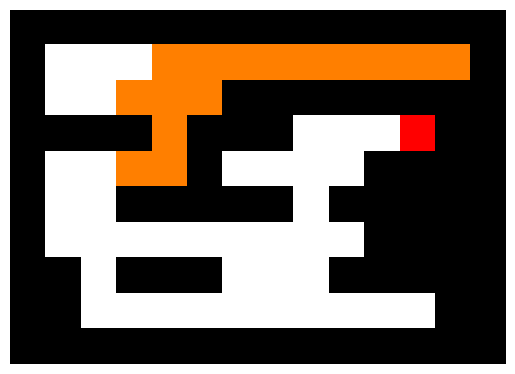

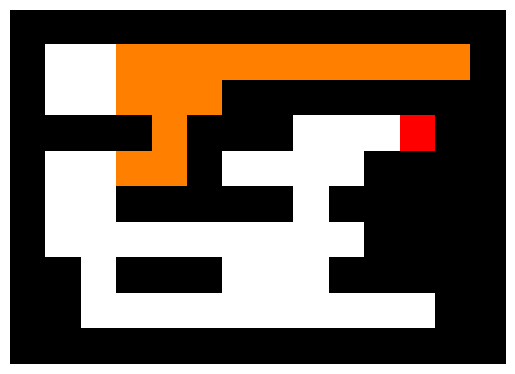

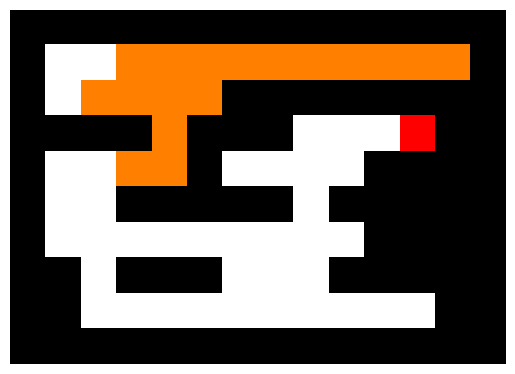

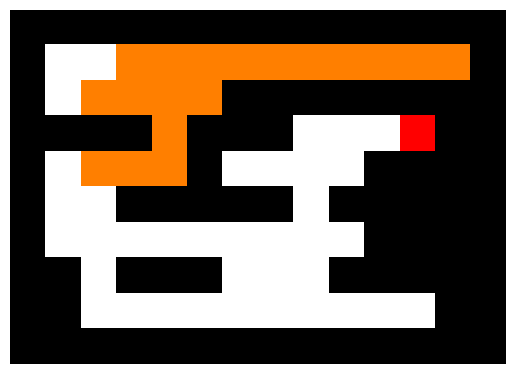

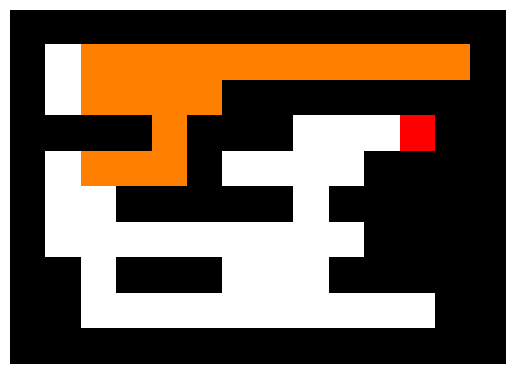

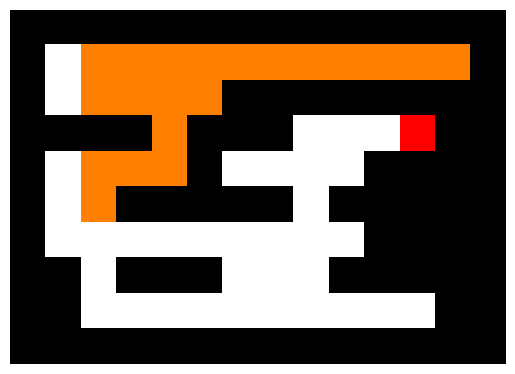

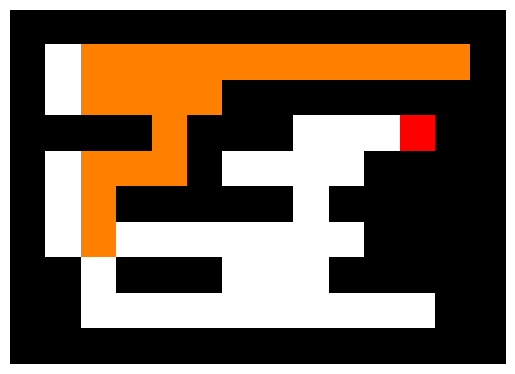

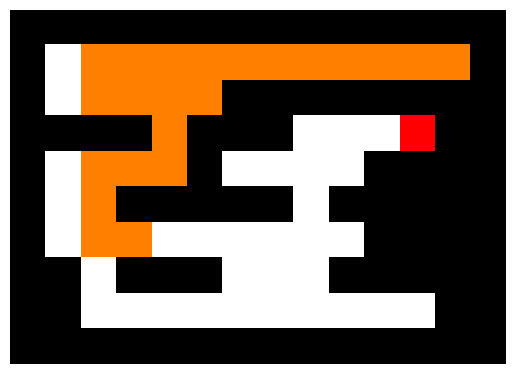

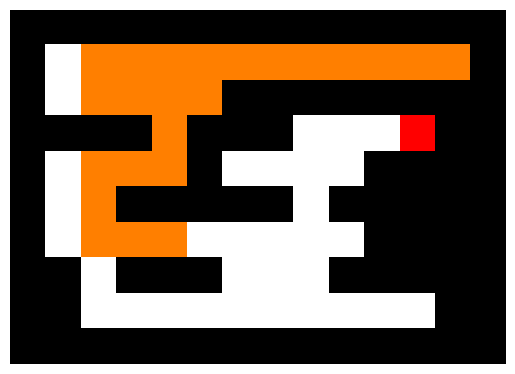

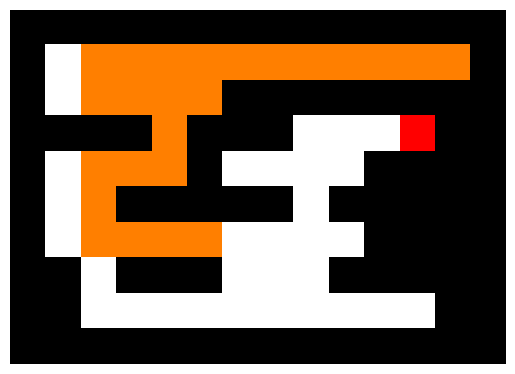

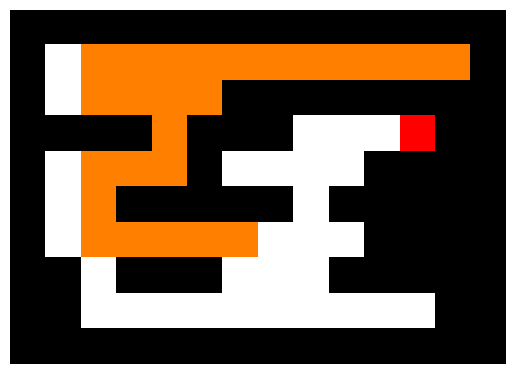

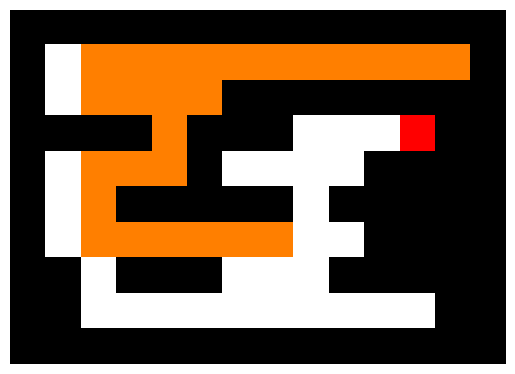

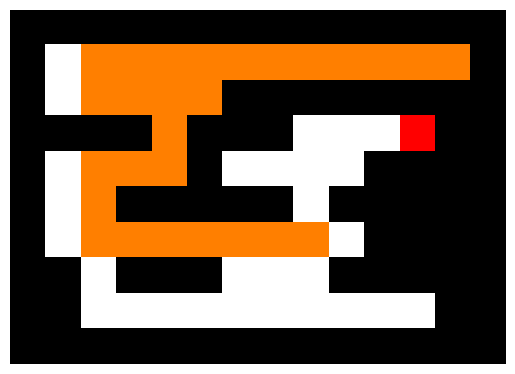

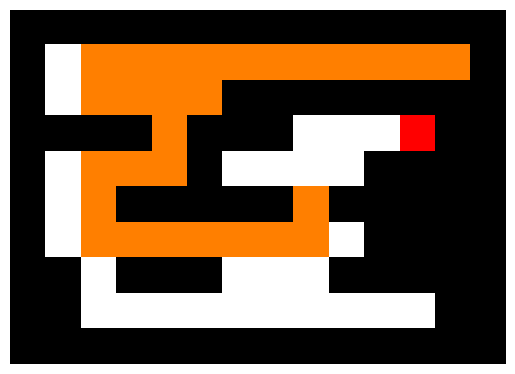

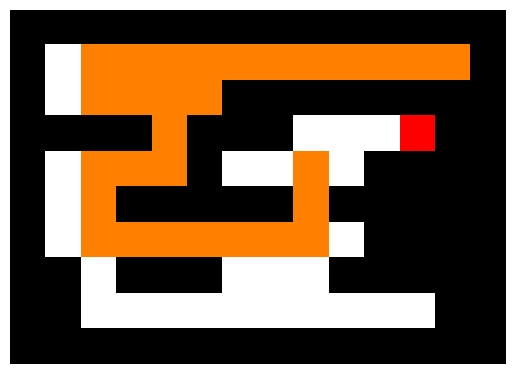

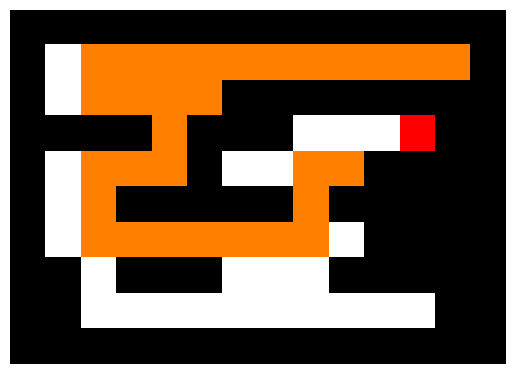

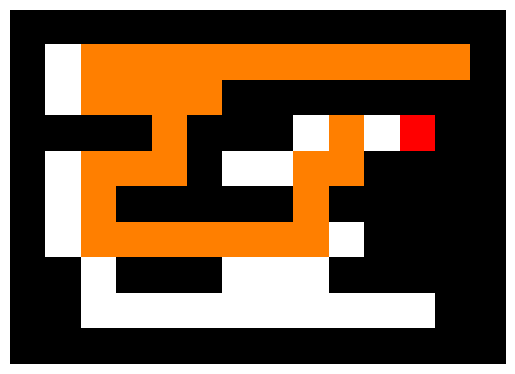

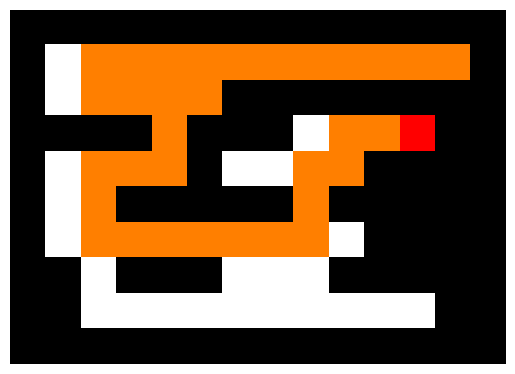

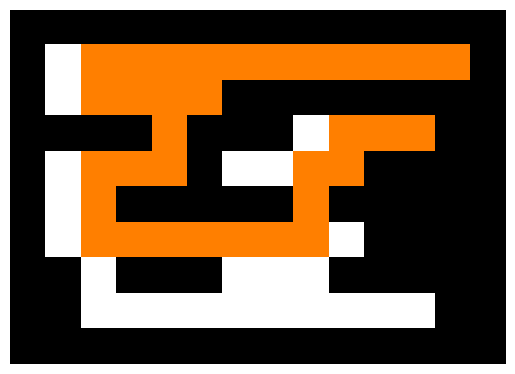

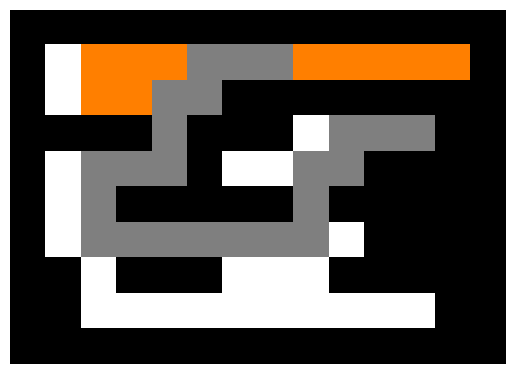

Caminho encontrado: [(1, 7), (1, 6), (1, 5), (2, 5), (2, 4), (3, 4), (4, 4), (4, 3), (4, 2), (5, 2), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (5, 8), (4, 8), (4, 9), (3, 9), (3, 10), (3, 11)]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

def cor_rgb(cor):
    return {'#': (0, 0, 0), 'S': (0, 1, 0), 'G': (1, 0, 0), '.': (1, 1, 1)}[cor]

def mostrar_labirinto(lab, inicio, fim, visitados=[], caminho=[]):
    img = np.zeros((len(lab), len(lab[0]), 3))
    for r in range(len(lab)):
        for c in range(len(lab[0])):
            img[r, c] = cor_rgb(lab[r][c])
    for loc in visitados:
        img[loc[0], loc[1]] = (1, 0.5, 0)  # Laranja para nós visitados
    for passo in caminho:
        img[passo[0], passo[1]] = (0.5, 0.5, 0.5)  # Cinza para caminho
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
    plt.show()
    time.sleep(0.1)

def distancia(a, b):
    return math.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

def encontrar_caminho_melhor_primeiro(lab):
    inicio, fim = (None, None), (None, None)
    for r in range(len(lab)):
        for c in range(len(lab[0])):
            if lab[r][c] == 'S':
                inicio = (r, c)
            elif lab[r][c] == 'G':
                fim = (r, c)

    fronteira = [(distancia(inicio, fim), inicio)]
    veio_de = {inicio: None}
    visitados = []

    while fronteira:
        fronteira.sort()
        _, atual = fronteira.pop(0)
        visitados.append(atual)
        mostrar_labirinto(lab, inicio, fim, visitados)
        if atual == fim:
            break
        r, c = atual
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            vizinho = (r + dr, c + dc)
            if 0 <= vizinho[0] < len(lab) and 0 <= vizinho[1] < len(lab[0]) and lab[vizinho[0]][vizinho[1]] != '#':
                if vizinho not in veio_de:
                    fronteira.append((distancia(vizinho, fim), vizinho))
                    veio_de[vizinho] = atual

    caminho = []
    while atual:
        caminho.append(atual)
        atual = veio_de[atual]
    caminho.reverse()

    mostrar_labirinto(lab, inicio, fim, visitados, caminho)
    return caminho

labirinto = [
    "##############",
    "#......S.....#",
    "#.....########",
    "####.###...G##",
    "#....#....####",
    "#..#####.#####",
    "#.........####",
    "##.###...#####",
    "##..........##",
    "##############"
]

caminho = encontrar_caminho_melhor_primeiro(labirinto)
print("Caminho encontrado:", caminho)
